In [4]:
import numpy as np
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
from PIL import Image
from itertools import permutations

from torchvision.utils import make_grid
import torch
import torchvision

%matplotlib inline

In [149]:
img = Image.open("D:\CDS\Spring 2020\Deep Learning\Project\DLSP20Dataset\data\scene_7\sample_12\CAM_BACK.jpeg")

In [150]:
image_transformer = torchvision.transforms.Compose(
    [
        torchvision.transforms.Resize(256, Image.BILINEAR),
        torchvision.transforms.CenterCrop(255),
    ]
)

def rgb_jittering(im):
    im = np.array(im, "int32")
    for ch in range(3):
        im[:, :, ch] += np.random.randint(-2, 2)
    im[im > 255] = 255
    im[im < 0] = 0
    return im.astype("uint8")

augment_tile = torchvision.transforms.Compose(
    [
        torchvision.transforms.Resize((112, 112), Image.BILINEAR),
        torchvision.transforms.Lambda(rgb_jittering),
        torchvision.transforms.ToTensor(),
    ]
)

In [151]:
p = list(permutations(range(4)))
p.remove((0, 2, 1, 3))

In [152]:
num_tiles = 4
# L = [0, 3, 6, 1, 4, 7, 2, 5, 8]
L = [0, 2, 1, 3]

img = image_transformer(img)
tile_size_x, tile_size_y = img.size[0]//2, img.size[1]//2
tiles   = [None] * num_tiles

temp = []

for i in range(num_tiles):
    x,y  = i//2, i%2
    crop = [tile_size_x*x, tile_size_y*y]
    crop = [crop[0], crop[1], crop[0]+tile_size_x, crop[1]+tile_size_y]
    tile = img.crop(crop)
    tile = augment_tile(tile)
    # tile_mean, tile_sd = tile.view(3,-1).mean(dim=1).numpy(), tile.view(3,-1).std(dim=1).numpy()
    # tile_sd[tile_sd==0] = 1
    # norm     = transforms.Normalize(mean=tile_mean.tolist(), std=tile_sd.tolist())
    # tile     = norm(tile)
    tiles[i] = tile
    
for perm in p:
    temp.append(torch.stack([tiles[perm[i]] for i in range(num_tiles)], 0))

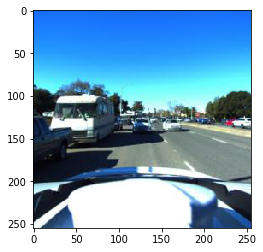

In [153]:
plt.imshow(img)

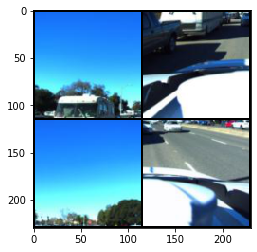

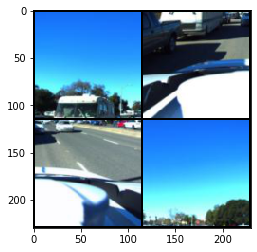

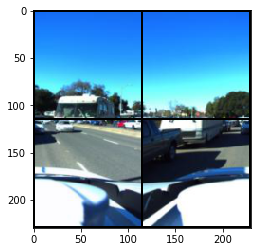

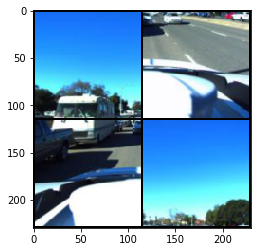

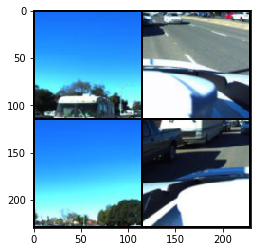

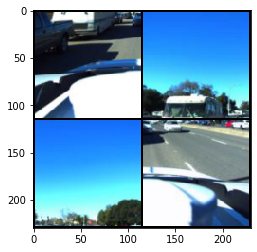

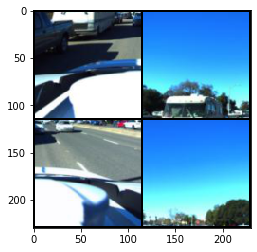

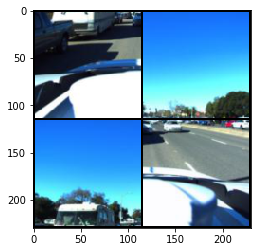

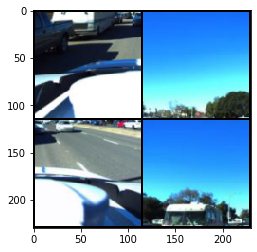

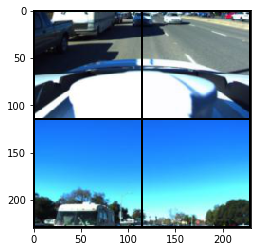

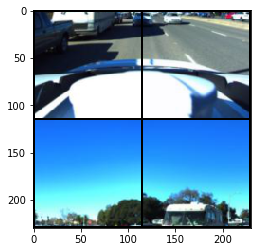

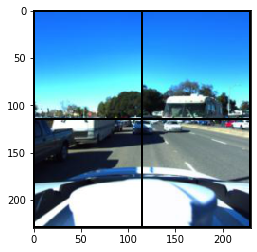

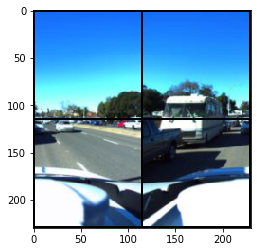

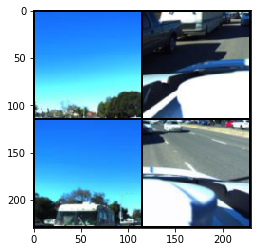

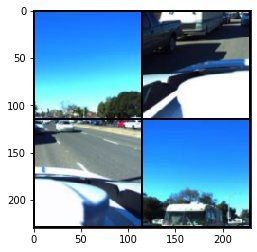

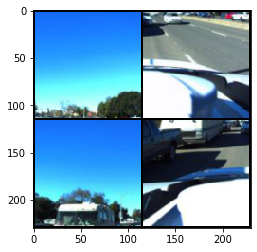

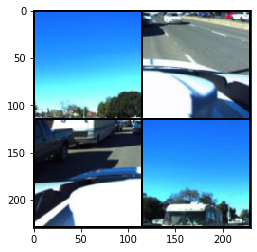

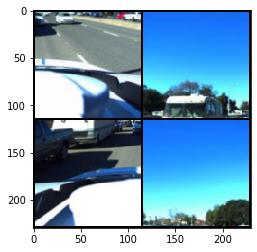

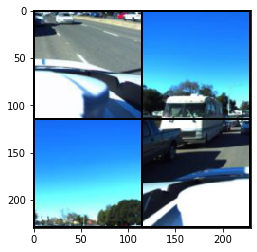

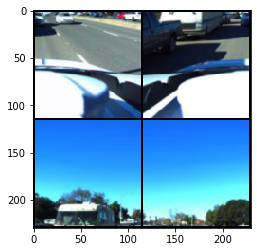

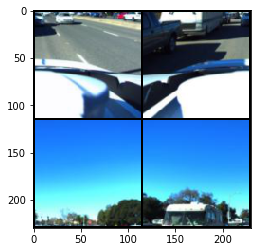

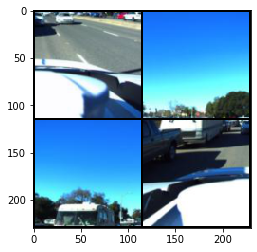

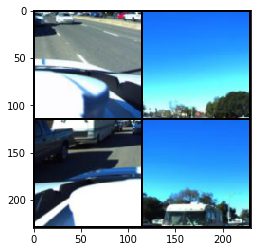

In [154]:
for t in temp:
    plt.imshow(make_grid(t, nrow=2).numpy().transpose(1, 2, 0))
    plt.show()